In [3]:
import os
from zen_garden.postprocess.results import Results

In [4]:
dataset_name1 = '01_SP_MV_PV'
output_path1 = dataset_name1  # or just dataset_name if already in the right folder
r1 = Results(output_path1)

FileNotFoundError: [Errno 2] No such file or directory: '01_SP_MV_PV\\scenarios.json'

In [15]:
dataset_name2 = '01_SP_MV_PV_new'
output_path2 = dataset_name2  # or just dataset_name if already in the right folder
r2 = Results(output_path2)

In [16]:
# get annual demand
demand_annual1 = r1.get_total("demand")
demand_annual1

0    1    2    3    4    5    6    7    8    9
carrier node                                                  
cell    CHE   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        CHN   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        DEU   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        IND   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        KOR   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
wafer   ROE   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        ROW   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        THA   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        USA   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        VNM   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[72 rows x 10 columns]

In [17]:
# get annual demand
demand_annual2 = r2.get_total("demand")
demand_annual2

0    1    2    3    4    5    6    7    8    9
carrier node                                                  
cell    CHE   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        CHN   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        DEU   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        IND   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        KOR   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
wafer   ROE   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        ROW   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        THA   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        USA   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
        VNM   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[72 rows x 10 columns]

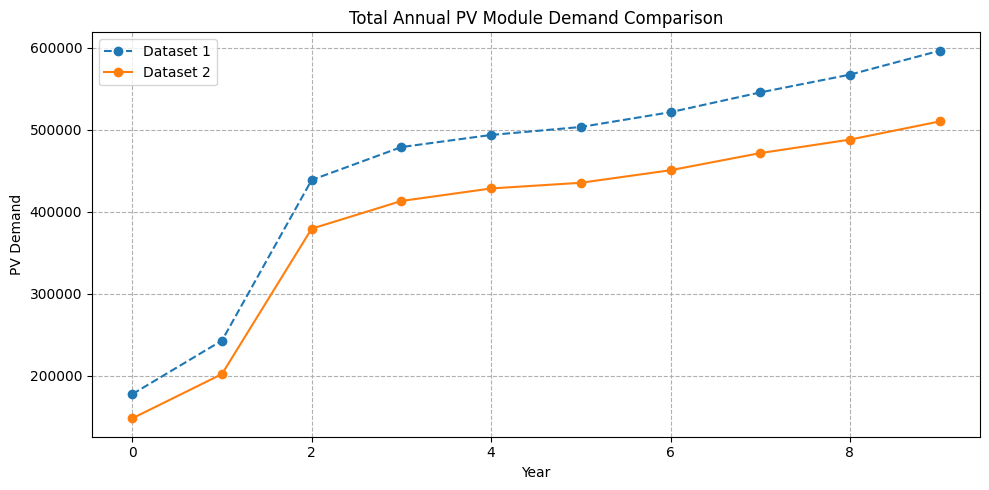

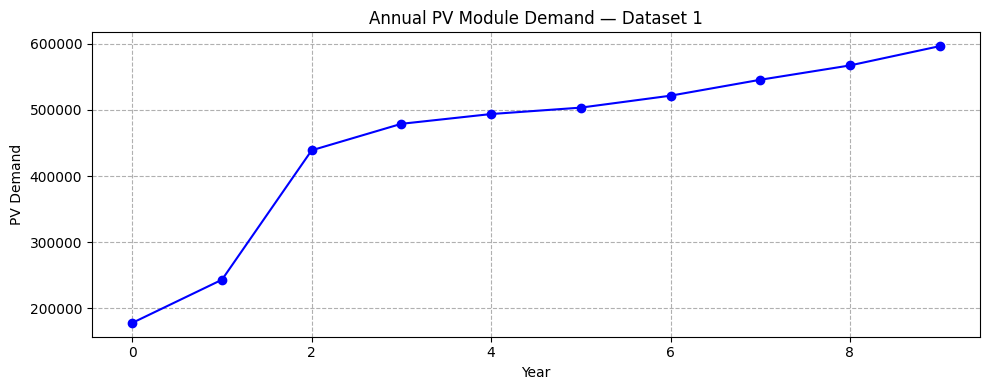

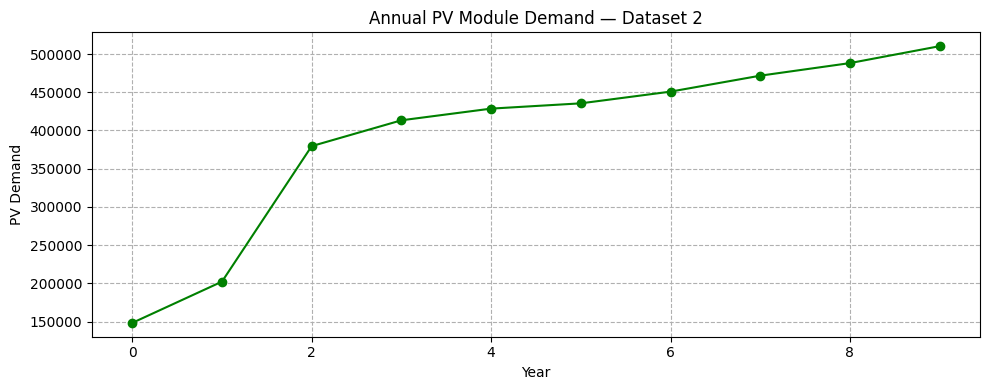

In [18]:
import matplotlib.pyplot as plt

# --- Helper to get year columns ---
def get_year_columns(df):
    return sorted(
        [col for col in df.columns if isinstance(col, int) or (isinstance(col, str) and str(col).isdigit())],
        key=int
    )

# --- Filter to pv_module only ---
pv1 = demand_annual1.xs("pv_module", level="carrier")
pv2 = demand_annual2.xs("pv_module", level="carrier")


# --- Year columns and labels ---
year_cols = get_year_columns(pv1)
years = list(map(int, year_cols))

# --- Total pv_module demand per year ---
total1 = pv1[year_cols].sum()
total2 = pv2[year_cols].sum()

# === Plot 1: Combined comparison ===
plt.figure(figsize=(10, 5))
plt.plot(years, total1.values, label="Dataset 1", linestyle="--", marker='o')
plt.plot(years, total2.values, label="Dataset 2", linestyle="-", marker='o')
plt.title("Total Annual PV Module Demand Comparison")
plt.xlabel("Year")
plt.ylabel("PV Demand")
plt.grid(True, linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

# === Plot 2: Dataset 1 only ===
plt.figure(figsize=(10, 4))
plt.plot(years, total1.values, color="blue", marker='o')
plt.title("Annual PV Module Demand — Dataset 1")
plt.xlabel("Year")
plt.ylabel("PV Demand")
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()

# === Plot 3: Dataset 2 only ===
plt.figure(figsize=(10, 4))
plt.plot(years, total2.values, color="green", marker='o')
plt.title("Annual PV Module Demand — Dataset 2")
plt.xlabel("Year")
plt.ylabel("PV Demand")
plt.grid(True, linestyle="--")
plt.tight_layout()
plt.show()
